# Seoul Bike Sharing

**Attribute Information:**

**-Rented Bike count:**  - Count of bikes rented at each hour, continuous numeric value<br>
**-Hour:** Hour of the day numeric value <br>
**-Temperature:** in Celsius numeric value <br>
**-Humidity:** in %, numeric value <br>
**-Windspeed:** in m/s, numeric value<br>
**-Visibility:** in 10m, numeric value<br>
**-Dew point temperature:** in Celsius, numeric value<br>
**-Solar radiation:** MJ/m2, numeric value<br>
**-Rainfall:** in mm, numeric value<br>
**-Snowfall:** in cm, numeric value<br>
**-Seasons:** Winter, Spring, Summer, Autumn categorical value<br>
**-Holiday:** Holiday/No holiday binary value<br>
**-Functional Day:** NoFunc(Non Functional Hours), Fun(Functional hours) binary value<br>


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

import sys
sys.path.insert(1, '../RegressionAlgorithms/')
from knn import *
import linearRegressionNumpy

### Get the Data

In [2]:
data = pd.read_csv('SeoulBikeData.csv', delimiter = ',', engine='python')

In [3]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Basic Data Information 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [5]:
data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [6]:
print(data.isnull().sum(axis=0))

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### Exploratory Data Analysis

**Rented Bike Count**

*Histogram of Rented Bike Count Distribution*

Text(0.5, 0, 'Rented Bike Count')

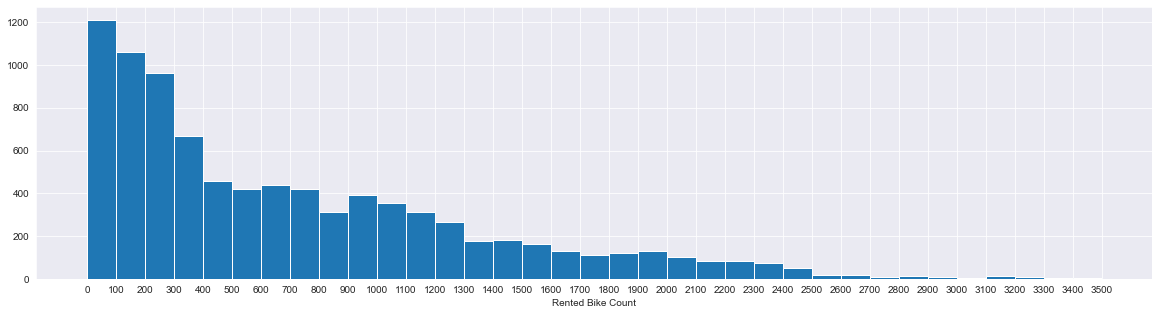

In [7]:
fig = plt.figure(figsize = (20,5))
sns.set_style('darkgrid')
bins = np.arange(0, 3540, 100).tolist()
data['Rented Bike Count'].hist(bins=bins)
plt.xticks(bins)
plt.xlabel('Rented Bike Count')

**Rented Bike Count vs Season**

In [8]:
data['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

*Box plot of Rented Bike Count vs Seasons*

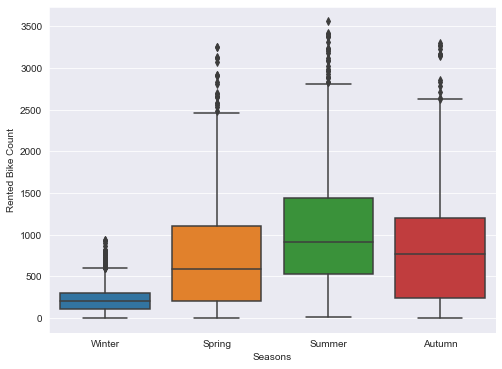

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Seasons'], y=data['Rented Bike Count'])
plt.show()

**Rented Bike Count vs Holiday**

*Box plot of Rented Bike Count vs Holiday*

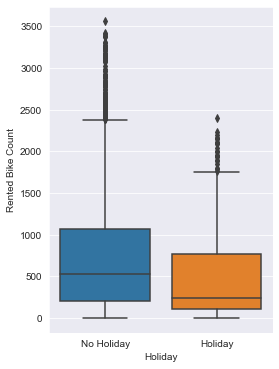

In [10]:
plt.figure(figsize=(4, 6))
sns.boxplot(x=data['Holiday'], y=data['Rented Bike Count'])
plt.show()

**Traffic Volume vs Temperature**

*Plot of Rented Bike Count vs Temperature*

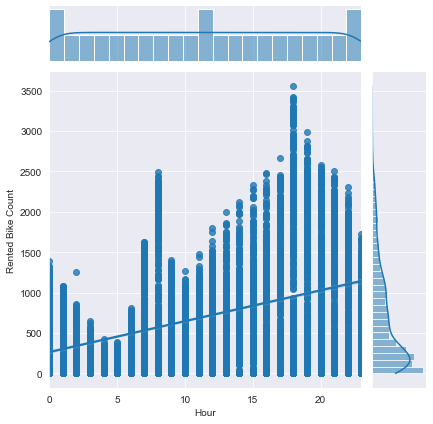

In [11]:
fig = sns.jointplot(x=data.iloc[:,2], y=data['Rented Bike Count'], kind='reg') #'Temperature(°C)'

**Traffic Volume vs Rainfall**

*Plot of Rented Bike Count vs Rainfall*

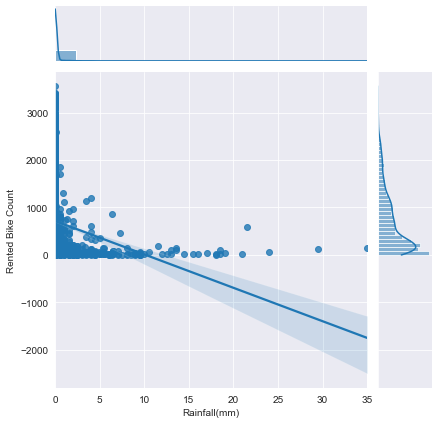

In [12]:
fig = sns.jointplot(x=data['Rainfall(mm)'], y=data['Rented Bike Count'], kind='reg')

*Removing outliers*

In [13]:
outliers = data[(data['Rainfall(mm)'] >= 20)]
data = data.drop(outliers.index)
data.index = np.arange(1, len(data) + 1)
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
3997,16/05/2018,151,13,21.8,97,2.4,682,21.2,0.06,35.0,0.0,Spring,No Holiday,Yes
5034,28/06/2018,596,18,20.6,97,0.7,222,20.1,0.14,21.5,0.0,Summer,No Holiday,Yes
5132,02/07/2018,61,20,23.5,97,0.1,1814,22.9,0.04,24.0,0.0,Summer,No Holiday,Yes
6501,28/08/2018,122,21,22.9,98,2.1,1146,22.5,0.00,29.5,0.0,Summer,No Holiday,Yes
6524,29/08/2018,19,20,23.4,98,0.6,70,23.0,0.00,21.0,0.0,Summer,No Holiday,Yes


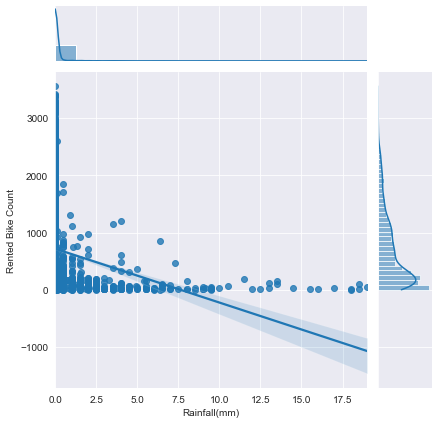

In [14]:
fig = sns.jointplot(x=data['Rainfall(mm)'], y=data['Rented Bike Count'], kind='reg')

**Traffic Volume vs Rainfall**

*Plot of Traffic Volume vs Wind Speed*

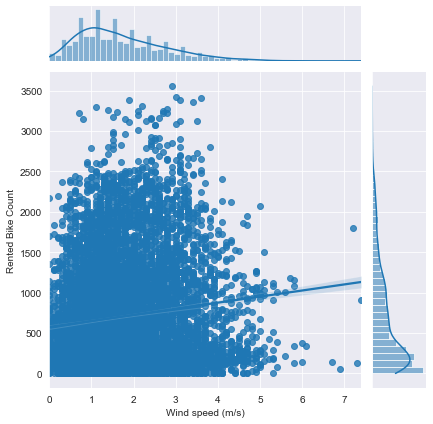

In [15]:
fig = sns.jointplot(data=data, x="Wind speed (m/s)", y="Rented Bike Count", kind='reg')

*Removing outliers*

In [16]:
outliers = data[(data['Wind speed (m/s)'] >6)]
data = data.drop(outliers.index)
data.index = np.arange(1, len(data) + 1)
outliers

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
934,08/01/2018,146,21,0.7,77,6.7,692,-2.8,0.0,0.9,1.0,Winter,No Holiday,Yes
3135,10/04/2018,913,14,21.2,35,7.4,1992,5.1,1.8,0.0,0.0,Spring,No Holiday,Yes
3139,10/04/2018,1805,18,19.7,52,7.2,2000,9.5,0.2,0.0,0.0,Spring,No Holiday,Yes
3141,10/04/2018,336,20,19.1,58,6.1,2000,10.6,0.0,0.0,0.0,Spring,No Holiday,Yes
3142,10/04/2018,133,21,17.5,70,7.3,1634,11.9,0.0,0.5,0.0,Spring,No Holiday,Yes
6314,21/08/2018,49,4,25.3,70,6.9,925,19.4,0.0,0.4,0.0,Summer,No Holiday,Yes


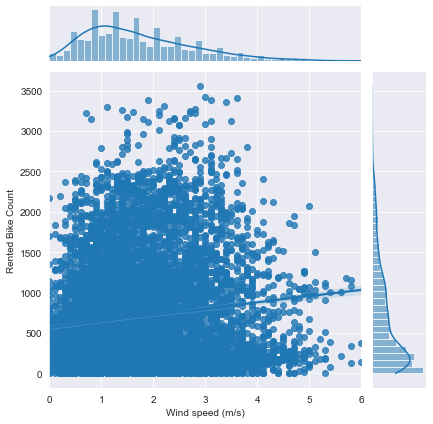

In [17]:
fig = sns.jointplot(data=data, x="Wind speed (m/s)", y="Rented Bike Count", kind='reg')

**Traffic Volume vs Snowfall**

*Plot of Traffic Volume vs Snowfall*

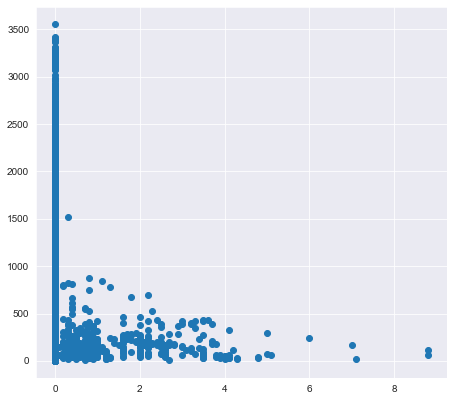

In [18]:
fig = plt.figure(figsize = (25,15))
ax1 = fig.add_subplot(2,3,1)
ax1.scatter(data=data, x="Snowfall (cm)", y="Rented Bike Count")

*Distribution only with snowy days*

In [19]:
data_snowy = data.loc[(data['Snowfall (cm)'] > 0)]
#data_snowy = data.loc[(data['weather_main'] == "Snow")]
data_snowy.index = np.arange(1, len(data_snowy) + 1)
data_snowy

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1,06/12/2017,145,0,-2.8,77,0.0,331,-6.2,0.00,0.1,0.1,Winter,No Holiday,Yes
2,06/12/2017,144,1,-3.0,79,0.0,293,-6.1,0.00,0.0,0.3,Winter,No Holiday,Yes
3,06/12/2017,117,2,-3.0,79,0.0,1862,-6.1,0.00,0.0,0.4,Winter,No Holiday,Yes
4,06/12/2017,78,3,-3.2,78,0.0,1808,-6.4,0.00,0.2,0.4,Winter,No Holiday,Yes
5,06/12/2017,58,4,-3.4,75,0.0,1982,-7.2,0.00,0.0,0.4,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438,26/11/2018,115,5,2.1,88,1.4,323,0.3,0.00,0.0,0.3,Autumn,No Holiday,Yes
439,26/11/2018,339,6,1.8,88,1.1,313,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes
440,26/11/2018,819,7,1.7,89,1.3,295,0.0,0.00,0.0,0.3,Autumn,No Holiday,Yes
441,26/11/2018,1524,8,2.0,84,1.1,396,-0.4,0.03,0.0,0.3,Autumn,No Holiday,Yes


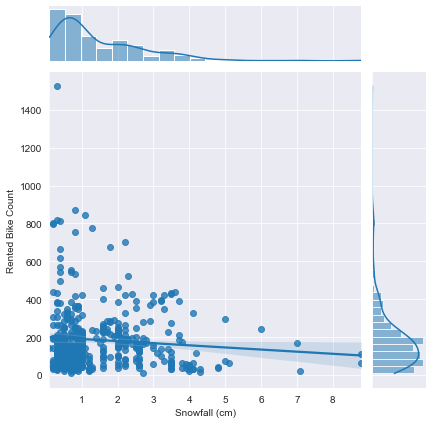

In [20]:
fig = sns.jointplot(data=data_snowy, x="Snowfall (cm)", y="Rented Bike Count", kind='reg')

**Traffic Volume vs Hour**

*Plot of Traffic Volume vs Hour*

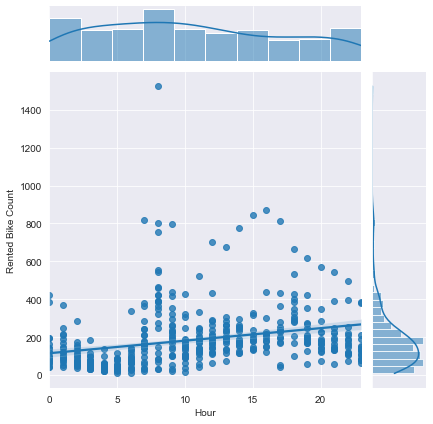

In [21]:
fig = sns.jointplot(data=data_snowy, x="Hour", y="Rented Bike Count", kind='reg')

**Feature Engineering on Date**

In [22]:
data[['Day','Month','Year']] = data['Date'].str.extract('(\d+)/(\d+)/(\d+)', expand=True)
data = data.drop(['Date'], axis=1)
data[['Day','Month','Year']] = data[['Day','Month','Year']].astype(float)

**Visualization**

*Bike Count vs Year*

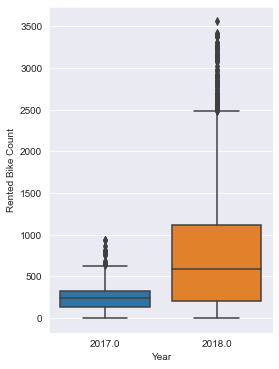

In [23]:
plt.figure(figsize=(4, 6))
sns.boxplot(x=data['Year'], y=data['Rented Bike Count'])
plt.show()

*Bike Count vs Year*

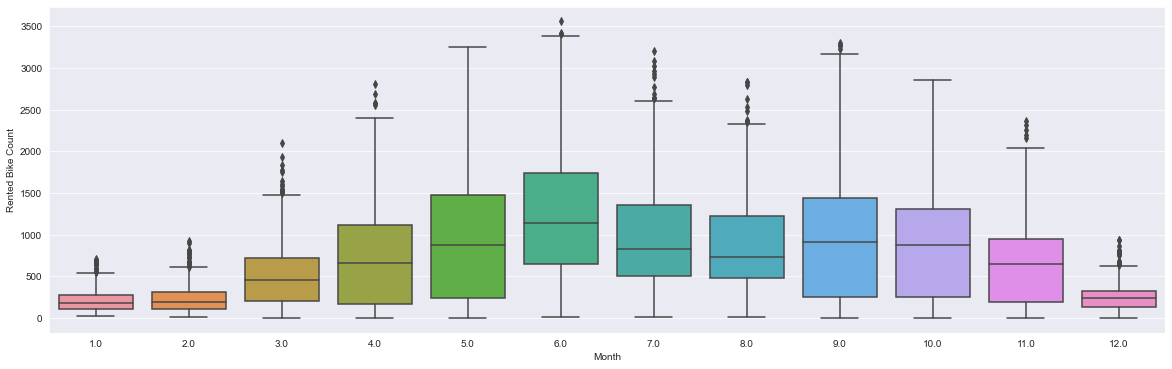

In [24]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['Month'], y=data['Rented Bike Count'])
plt.show()

*Rented Bike Count vs Hour*

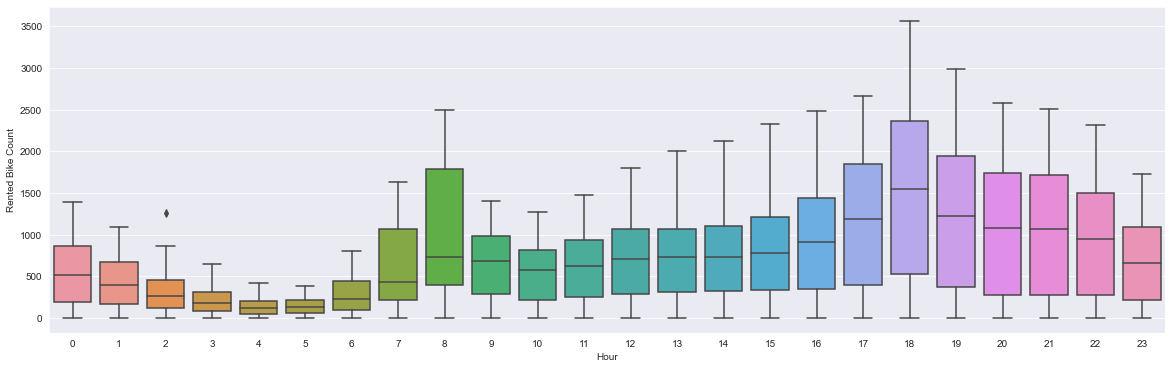

In [25]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=data['Hour'], y=data['Rented Bike Count'])
plt.show()

## Data Preprocessing

*Preprocess Binary Data*

In [26]:
data = data.replace(to_replace=['No Holiday', 'Holiday'], value=[0, 1])
data = data.replace(to_replace=['No', 'Yes'], value=[0, 1])

*Preprocess Non Ordinal Data*

In [27]:
one_hot = pd.get_dummies(data["Seasons"])
data = data.drop("Seasons",axis = 1)
data = data.join(one_hot.astype(float))

In [28]:
X = data.drop('Rented Bike Count', axis=1)
y = data['Rented Bike Count']

In [29]:
scaler = StandardScaler()
scaler = scaler.fit(X)
X_scaled = scaler.transform(X)

#split the data in attributes and class as well as training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8749 entries, 1 to 8749
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8749 non-null   int64  
 1   Hour                       8749 non-null   int64  
 2   Temperature(°C)            8749 non-null   float64
 3   Humidity(%)                8749 non-null   int64  
 4   Wind speed (m/s)           8749 non-null   float64
 5   Visibility (10m)           8749 non-null   int64  
 6   Dew point temperature(°C)  8749 non-null   float64
 7   Solar Radiation (MJ/m2)    8749 non-null   float64
 8   Rainfall(mm)               8749 non-null   float64
 9   Snowfall (cm)              8749 non-null   float64
 10  Holiday                    8749 non-null   int64  
 11  Functioning Day            8749 non-null   int64  
 12  Day                        8749 non-null   float64
 13  Month                      8749 non-null   float

## Regression Tasks

*Regression Algorithms from Sklearn*

### Linear Regression

In [31]:
start = time.time()

model = linear_model.LinearRegression().fit(X_train, y_train)

end = time.time()
# Make predictions using the testing set
y_pred1 = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_, model.intercept_)


Coefficients: 
 [ 2.77694178e+01  1.38227690e+01 -1.19712653e+01  2.04510548e+01
  6.69016118e-03  1.41661198e+01 -9.02975784e+01 -7.17030189e+01
  3.83206903e+01 -1.31480980e+02  9.23301276e+02 -6.13638294e-01
 -3.99149344e+01 -4.97131695e+02  3.40488435e+02 -2.58712459e+01
  7.15759642e+01 -3.86193153e+02] 1003412.8921961345


**Evaluation metrics**

In [32]:
print('cross validation score: ', cross_val_score(model, X_test, y_pred1, cv=10))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("Time: %0.2f" % (end - start), "seconds")

cross validation score:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Coefficient of determination: 0.54
Mean Absolute Error: 323.20484720989356
Mean Squared Error: 191879.73210815951
Root Mean Squared Error: 438.0407881786347
Time: 0.01 seconds


### KNN Regression

In [33]:
start = time.time()
model = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
end = time.time()
# Make predictions using the testing set
y_pred= model.predict(X_test)

**Evaluation metrics**

In [34]:
print('cross validation score: ', cross_val_score(model, X_test, y_pred, cv=10))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Time: %0.2f" % (end - start), "seconds")

cross validation score:  [0.58505998 0.6958901  0.64094316 0.75355736 0.70025548 0.70532298
 0.74134175 0.66970205 0.7733319  0.67385303]
Coefficient of determination: 0.52
Mean Absolute Error: 303.0
Mean Squared Error: 200380.78785185184
Root Mean Squared Error: 447.63912681070656
Time: 0.05 seconds


### Decision Tree Regression

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
start = time.time()
model = DecisionTreeRegressor(random_state = 0).fit(X_train, y_train)
end = time.time()

# Make predictions using the testing set
y_pred = model.predict(X_test)


**Evaluation metrics**

In [37]:
print('cross validation score: ', cross_val_score(model, X_test, y_pred, cv=10))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Time: %0.2f" % (end - start), "seconds")

cross validation score:  [0.72086953 0.64822557 0.63069244 0.76903044 0.60683159 0.71039227
 0.59157445 0.73061527 0.70377928 0.74921766]
Coefficient of determination: 0.77
Mean Absolute Error: 179.96952380952382
Mean Squared Error: 96960.20723809524
Root Mean Squared Error: 311.38434006560965
Time: 0.07 seconds


### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
start = time.time()
model = RandomForestRegressor().fit(X_train, y_train)
end = time.time()
# Make predictions using the testing set
y_pred = model.predict(X_test)

**Evaluation metrics**

In [41]:
print('cross validation score: ', cross_val_score(model, X_test, y_pred, cv=10))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("Time: %0.2f" % (end - start), "seconds")

cross validation score:  [0.97679811 0.96625695 0.96171868 0.97857956 0.96471601 0.9696067
 0.96638513 0.97564444 0.97810012 0.97408619]
Coefficient of determination: 0.88
Mean Absolute Error: 136.38518095238095
Mean Squared Error: 52347.052796647615
Root Mean Squared Error: 228.79478314998272
Time: 3.41 seconds


*Our Regression Algorithms*

### Linear Regression Function (MSE)

no bias to remove X_train
no bias to remove X_test
no bias to remove X

 Seoul: Linear Regression Function (MSE):
epsilon       | sum total error:   | sum relative error:  | iterations | Rsquare |    time/s
        1E+05 | 385413.126904889   | 2828.272649508549    | 2          |  -1.1593|    0.19116
        1E+04 | -48367.16620237624 | -716.5615698538278   | 9          |   0.4703|    0.24542
        1E+03 | -27336.082115750054| -94.00074076267526   | 24         |   0.5371|    0.36670
        1E+02 | -362.46536557089485| -175.48183234427506  | 34         |   0.5490|    0.57121
        1E+01 | 1013.4438476191262 | -82.18020636940331   | 121        |   0.5538|    0.93628
        1E+00 | -1141.4418392175148| 41.54182300261114    | 265        |   0.5538|    2.18423
        1E-01 | -1831.052791530602 | 79.33936180567345    | 399        |   0.5536|    5.47090
        1E-02 | -2048.8113478331757| 90.86058839868488    | 525        |   0.5535|    4.54410
        1E-03 | -2117.736528145508 | 94.4

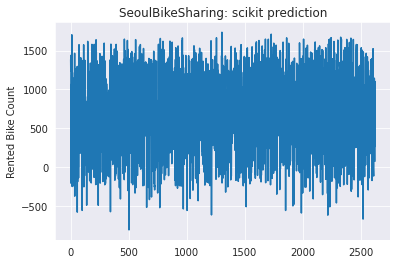

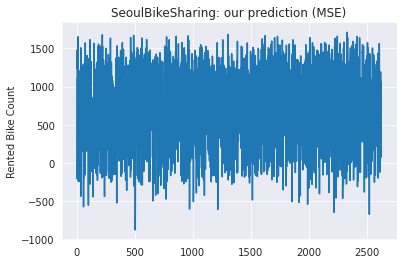

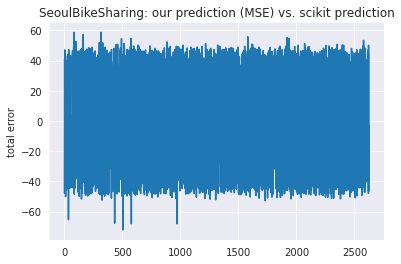

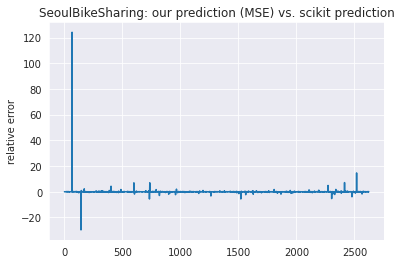

In [39]:
try:
    del X_train['bias']
except:
    print('no bias to remove X_train')    
try:
    del X_test['bias']
except:
    print('no bias to remove X_test')
try:
    del X['bias']
except:
    print('no bias to remove X')




print('\n Seoul: Linear Regression Function (MSE):')    
alphaMethod = 'const'
mu = 1
convCritList = [1e5, 1e4, 1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
print('epsilon       | sum total error:   | sum relative error:  | iterations | Rsquare |    time/s')
for convergenceCriterion in convCritList:
    start = time.time()
    weights, score, iterations = linearRegressionNumpy.linearRegression(X_train, y_train, mu = mu, 
                                                        convergenceCriterion = convergenceCriterion, lossFunction = 'MSE', 
                                                        alphaMethod = alphaMethod, printOutput = False)
    end = time.time()
    yPred2 = linearRegressionNumpy.predictLinearRegression(X_test, weights)
    


    print('{:13.0E} | {:19}| {:21}| {:11}| {:8.4f}| {:10.5f}'.format(convergenceCriterion, 
                                        str(np.sum(yPred2-y_pred1)), 
                                        str(np.sum((yPred2-y_pred1)/y_pred1)),
                                        str(iterations),
                                        r2_score(y_test, yPred2),
                                        end-start))


print('\nFinal weigths for smallest epsilon = {:2.0E}:'.format(convCritList[-1]))
print('weights = ', weights, '\n')

plt.title('SeoulBikeSharing: scikit prediction')
plt.plot(y_pred1)
plt.ylabel('Rented Bike Count')
plt.savefig('SeoulBikeSharing_scikit_prediction_MSE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (MSE)')
plt.plot(yPred2)
plt.ylabel('Rented Bike Count')
plt.savefig('SeoulBikeSharing_our_prediction_MSE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (MSE) vs. scikit prediction')
plt.plot(yPred2-y_pred1)
plt.ylabel('total error')
plt.savefig('SeoulBikeSharing_total_error_MSE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (MSE) vs. scikit prediction')
plt.plot((yPred2-y_pred1)/y_pred1)
plt.ylabel('relative error')
plt.savefig('SeoulBikeSharing_relative_error_MSE.jpeg', bbox_inches='tight')
plt.show()



**Evaluation metrics**

In [40]:
print('\n Seoul: Linear Regression Function (MSE):')
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, yPred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yPred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yPred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yPred2)))


 Seoul: Linear Regression Function (MSE):
Coefficient of determination: 0.55
Mean Absolute Error: 322.5473685387529
Mean Squared Error: 191860.78849671726
Root Mean Squared Error: 438.0191645313219


### Linear Regression Function (MAE)

no bias to remove X_train
no bias to remove X_test
no bias to remove X

 
 Seoul: Linear Regression Function (MAE):
epsilon       | sum total error:   | sum relative error:  | iterations | Rsquare |    time/s
        1E+05 | -31755.29573485673 | -1059.3484205933767  | 2          |  -0.3763|    0.05590
        1E+04 | -31755.29573485673 | -1059.3484205933767  | 2          |  -0.3763|    0.08353
        1E+03 | -31755.29573485673 | -1059.3484205933767  | 2          |  -0.3763|    0.10939
        1E+02 | -31755.29573485673 | -1059.3484205933767  | 2          |  -0.3763|    0.15195
        1E+01 | -111329.68615485486| -734.9821623649882   | 6          |   0.3548|    0.19428
        1E+00 | -195001.5278022484 | -337.20515593359846  | 20         |   0.5118|    0.22545
        1E-01 | -195032.52267930686| -321.2344424196488   | 37         |   0.5161|    0.35060
        1E-02 | -201843.09246744882| -283.0049687146118   | 52         |   0.5180|    0.36660
        1E-03 | -195633.20262264105| -2

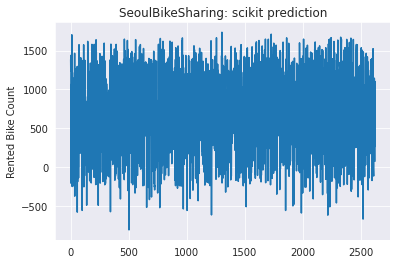

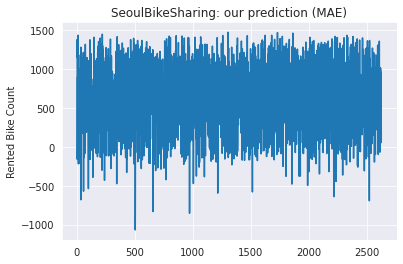

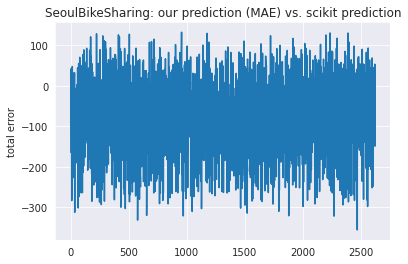

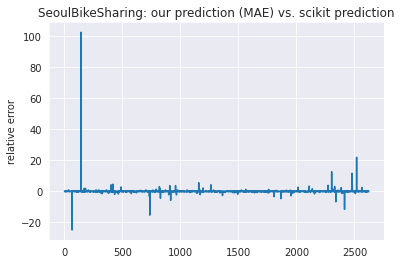

In [41]:
try:
    del X_train['bias']
except:
    print('no bias to remove X_train')    
try:
    del X_test['bias']
except:
    print('no bias to remove X_test')
try:
    del X['bias']
except:
    print('no bias to remove X')




print('\n \n Seoul: Linear Regression Function (MAE):')    
alphaMethod = 'const'
mu = 1
convCritList = [1e5, 1e4, 1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
print('epsilon       | sum total error:   | sum relative error:  | iterations | Rsquare |    time/s')
for convergenceCriterion in convCritList:
    start = time.time()
    weights, score, iterations = linearRegressionNumpy.linearRegression(X_train, y_train, mu = mu, 
                                                        convergenceCriterion = convergenceCriterion, lossFunction = 'MAE', 
                                                        alphaMethod = alphaMethod, printOutput = False)
    end = time.time()
    yPred2 = linearRegressionNumpy.predictLinearRegression(X_test, weights)



    print('{:13.0E} | {:19}| {:21}| {:11}| {:8.4f}| {:10.5f}'.format(convergenceCriterion, 
                                        str(np.sum(yPred2-y_pred1)), 
                                        str(np.sum((yPred2-y_pred1)/y_pred1)),
                                        str(iterations),
                                        r2_score(y_test, yPred2),
                                        end-start))
    
print('\nFinal weigths for smallest epsilon = {:2.0E}:'.format(convCritList[-1]))
print('weights = ', weights, '\n')

plt.title('SeoulBikeSharing: scikit prediction')
plt.plot(y_pred1)
plt.ylabel('Rented Bike Count')
plt.savefig('SeoulBikeSharing_scikit_prediction_MAE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (MAE)')
plt.plot(yPred2)
plt.ylabel('Rented Bike Count')
plt.savefig('SeoulBikeSharing_our_prediction_MAE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (MAE) vs. scikit prediction')
plt.plot(yPred2-y_pred1)
plt.ylabel('total error')
plt.savefig('SeoulBikeSharing_total_error_MAE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (MAE) vs. scikit prediction')
plt.plot((yPred2-y_pred1)/y_pred1)
plt.ylabel('relative error')
plt.savefig('SeoulBikeSharing_relative_error_MAE.jpeg', bbox_inches='tight')
plt.show()


**Evaluation metrics**

In [42]:
print('\n Seoul: Linear Regression Function (MAE):')
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, yPred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yPred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yPred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yPred2)))


 Seoul: Linear Regression Function (MAE):
Coefficient of determination: 0.52
Mean Absolute Error: 312.9286328683736
Mean Squared Error: 205879.17841084916
Root Mean Squared Error: 453.7391083109865


### Linear Regression Function (RMSE)

no bias to remove X_train
no bias to remove X_test
no bias to remove X

 Seoul: Linear Regression Function (RMSE):
epsilon       | sum total error:   | sum relative error:  | iterations | Rsquare |    time/s
        1E+05 | -10568.119647286618| 2310.763501392293    | 2          |  -0.7191|    0.09971
        1E+04 | -10568.119647286618| 2310.763501392293    | 2          |  -0.7191|    0.13711
        1E+03 | -10568.119647286618| 2310.763501392293    | 2          |  -0.7191|    0.13610
        1E+02 | -10568.119647286618| 2310.763501392293    | 2          |  -0.7191|    0.12515
        1E+01 | -41139.87483966679 | 866.0923281265693    | 8          |   0.3970|    0.18094
        1E+00 | 3490.1118227944007 | 356.0261360491062    | 19         |   0.5471|    0.49521
        1E-01 | -1303.367215293145 | 104.92799181501113   | 28         |   0.5519|    0.68914
        1E-02 | -1860.4378363117244| -83.04368151172173   | 72         |   0.5543|    1.12165
        1E-03 | -2195.9100135778745| 11.

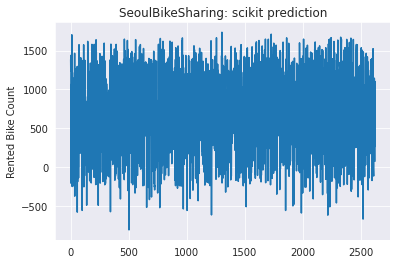

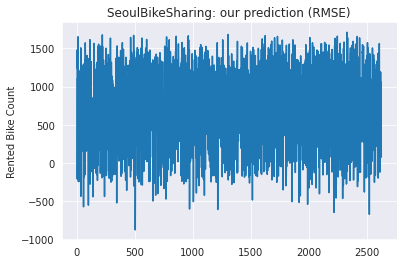

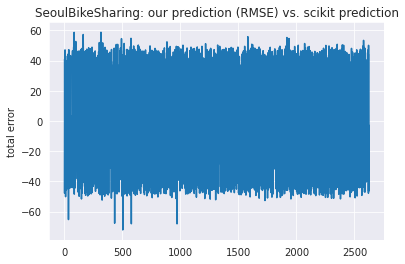

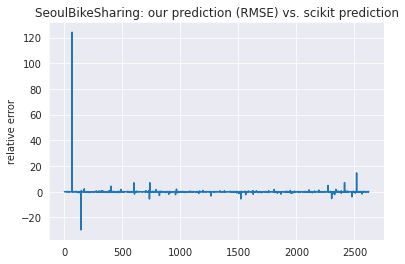

In [43]:
try:
    del X_train['bias']
except:
    print('no bias to remove X_train')    
try:
    del X_test['bias']
except:
    print('no bias to remove X_test')
try:
    del X['bias']
except:
    print('no bias to remove X')



print('\n Seoul: Linear Regression Function (RMSE):')

alphaMethod = 'const'
mu = 1
convCritList = [1e5, 1e4, 1e3, 1e2, 1e1, 1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8]
print('epsilon       | sum total error:   | sum relative error:  | iterations | Rsquare |    time/s')
for convergenceCriterion in convCritList:
    start = time.time()
    weights, score, iterations = linearRegressionNumpy.linearRegression(X_train, y_train, mu = mu, 
                                                        convergenceCriterion = convergenceCriterion, lossFunction = 'RMSE', 
                                                        alphaMethod = alphaMethod, printOutput = False)
    end = time.time()
    yPred2 = linearRegressionNumpy.predictLinearRegression(X_test, weights)



    print('{:13.0E} | {:19}| {:21}| {:11}| {:8.4f}| {:10.5f}'.format(convergenceCriterion, 
                                        str(np.sum(yPred2-y_pred1)), 
                                        str(np.sum((yPred2-y_pred1)/y_pred1)),
                                        str(iterations),
                                        r2_score(y_test, yPred2),
                                        end-start))

print('\nFinal weigths for smallest epsilon = {:2.0E}:'.format(convCritList[-1]))
print('weights = ', weights, '\n')

plt.title('SeoulBikeSharing: scikit prediction')
plt.plot(y_pred1)
plt.ylabel('Rented Bike Count')
plt.savefig('SeoulBikeSharing_scikit_prediction_RMSE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (RMSE)')
plt.plot(yPred2)
plt.ylabel('Rented Bike Count')
plt.savefig('SeoulBikeSharing_our_prediction_RMSE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (RMSE) vs. scikit prediction')
plt.plot(yPred2-y_pred1)
plt.ylabel('total error')
plt.savefig('SeoulBikeSharing_total_error_RMSE.jpeg', bbox_inches='tight')
plt.show()

plt.title('SeoulBikeSharing: our prediction (RMSE) vs. scikit prediction')
plt.plot((yPred2-y_pred1)/y_pred1)
plt.ylabel('relative error')
plt.savefig('SeoulBikeSharing_relative_error_RMSE.jpeg', bbox_inches='tight')
plt.show()


**Evaluation metrics**

In [44]:
print('\n Seoul: Linear Regression Function (RMSE):')
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, yPred2))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yPred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yPred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yPred2)))


 Seoul: Linear Regression Function (RMSE):
Coefficient of determination: 0.55
Mean Absolute Error: 322.547356336139
Mean Squared Error: 191860.5461710984
Root Mean Squared Error: 438.018887915919


### KNN

**Dictionary creation to apply the mathematical functions of the algorithm**

In [ ]:
dictionary = data.to_dict('records')

In [ ]:
dictionary

In [ ]:
len(dictionary)

**Forecasting instances**

In [ ]:
y_test

**Algorithm parameters**

In [ ]:
mode = 1 # 1 = KNeighbors; 2 = RadiusNeighbors
n_neighbours = 5
distance_function = 1 # 1 = Euclidean Distance; 2 = Manhattan Distance
radius = 0 # 0 indicates no radius
label = 'Rented Bike Count'
features = ['Temperature(�C)','Hour','Wind speed (m/s)','Humidity(%)']

**Algorithm initialization**

In [ ]:
knn = KNN(dictionary, label, features, mode, n_neighbours, distance_function, radius)

**Execution of the algorithm (forecasting)**

In [ ]:
results = []

for x in y_test.index:
    #print(x)
    target = dictionary[x-1]
    #print(target)
    result = knn.run(target)
    #print(result)
    results.append(result)

**Predictions**

In [ ]:
predictions = pd.Series(results,index=y_test.index)

In [ ]:
predictions

**Evaluation metrics**

In [ ]:
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, predictions))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))